In [0]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pylab as plt
import numpy as np
import PIL.Image as Image

IMAGE_SHAPE = (299, 299)

tf.keras.utils.get_file(
  'training','https://data.deic.dk/public.php?service=files&t=2fd47962a38e2a70570f3be027cea57f&download',
   untar=True)
tf.keras.utils.get_file(
  'test','https://data.deic.dk/public.php?service=files&t=53f154ca9e9f1e6aee8587f5d18f81fd&download',
   untar=True)

1381154816/1381151715 [==============================] - 76s 0us/step


'/root/.keras/datasets/test'

In [0]:
train_annotation_url = 'https://data.deic.dk/public.php?service=files&t=8dc110f312677d2b53003de983b3a26e&download'
test_annotation_url = 'https://data.deic.dk/public.php?service=files&t=c899715d20e2e80063ced63d9cfec9c3&download'

tf.keras.utils.get_file('annotation', train_annotation_url, untar=True)
tf.keras.utils.get_file('test.json', test_annotation_url, untar=True)

98304/91660 [================================] - 1s 8us/step


'/root/.keras/datasets/test.json'

In [0]:
import json

def get_na_fungi_filenames(annotations, fungi_set, is_train=True, image_ids=set()):
  if (is_train):
    with open(annotations) as JSON:
      data = json.load(JSON)
      category_id_set = set()
      for mushroom in data['categories']:
          if mushroom['name'].split('var.')[0] in fungi_set:
              category_id_set.add(mushroom['id'])
      image_id_set = set()
      for annotation in data['annotations']:
          if annotation['category_id'] in category_id_set:
              image_id_set.add(annotation['image_id'])
      na_fungi = set()
      for image in data['images']:
          if image['id'] in image_id_set:
              na_fungi.add(image['file_name'])
      return category_id_set, na_fungi
  else:
      with open(annotations) as JSON:
        data = json.load(JSON)
        na_fungi = set()
        for image in data['images']:
          if image['id'] in image_ids:
            na_fungi.add(image['file_name'])
        return None, na_fungi

# Select NA fungi and place their names in train_set, val_set, and test_set
with open(r'/content/fungi_us.txt') as file:
    fungi_data = file.readlines()
fungi_set = set()
for fungi in fungi_data:
    fungi_set.add(fungi.strip())

id_set, train_set = get_na_fungi_filenames(r'/root/.keras/datasets/train.json', fungi_set)
_, val_set = get_na_fungi_filenames(r'/root/.keras/datasets/val.json', fungi_set)
_, test_set = get_na_fungi_filenames(r'/root/.keras/datasets/test.json', fungi_set, False, id_set)

print(len(train_set))
print(len(val_set))

27022
969


In [0]:
import shutil
import os

for image in train_set:
  dest_fpath = '/root/.keras/datasets/filtered/' + image
  os.makedirs(os.path.dirname(dest_fpath), exist_ok=True)
  shutil.copy('/root/.keras/datasets/' + image, dest_fpath)

for image in val_set:
  dest_fpath = '/root/.keras/datasets/filtered/' + image
  os.makedirs(os.path.dirname(dest_fpath), exist_ok=True)
  shutil.copy('/root/.keras/datasets/' + image, dest_fpath)

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())


16384/10484 [==============================================] - 0s 0us/step


In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    )
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    '/root/.keras/datasets/filtered/images',
    target_size=IMAGE_SHAPE,
    subset="training",
    batch_size=32)
validation_generator = train_datagen.flow_from_directory(
    '/root/.keras/datasets/filtered/images',
    target_size=IMAGE_SHAPE,
    subset="validation")
# test_generator = test_datagen.flow_from_directory(
#     str(test_root),
#     target_size=IMAGE_SHAPE
# )

for image_batch, label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Found 22514 images belonging to 323 classes.
Found 5477 images belonging to 323 classes.
Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 323)


In [0]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['10056_Agaricus_Arvensis', '10057_Agaricus_Augustus',
       '10059_Agaricus_Bernardii', '10061_Agaricus_Bisporus',
       '10062_Agaricus_Bitorquis', '10065_Agaricus_Campestris',
       '10090_Agaricus_Moelleri', '10106_Agaricus_Dulcidulus',
       '10116_Agaricus_Xanthodermus', '10128_Agrocybe_Praecox',
       '10225_Amanita_Ceciliae', '10230_Amanita_Excelsa',
       '10232_Amanita_Franchetii', '10234_Amanita_Fulva',
       '10252_Amanita_Muscaria', '10260_Amanita_Porphyria',
       '10266_Amanita_Strobiliformis', '10317_Amylostereum_Chailletii',
       '10432_Antrodia_Serialis', '10526_Armillaria_Mellea',
       '10527_Armillaria_Ostoyae', '10558_Arrhenia_Lobata',
       '10667_Ascocoryne_Sarcoides', '10891_Asterophora_Parasitica',
       '10940_Auriscalpium_Vulgare', '10969_Baeospora_Myosura',
       '11044_Bjerkandera_Fumosa', '11062_Butyriboletus_Appendiculatus',
       '11064_Imleria_Badia', '11068_Caloboletus_Calopus',
       '11069_Boletus_Edulis', '11082_Xerocomellus_C

In [0]:
import keras.backend as K
K.set_learning_phase(1)

feature_extractor_url = "https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(299,299,3))

feature_batch = feature_extractor_layer(image_batch)
feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dropout(0.2),
  layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

predictions = model(image_batch)

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
  metrics=['acc', 'top_k_categorical_accuracy'])

class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    if batch % 100 == 0:
      self.batch_losses.append(logs['loss'])
      self.batch_acc.append(logs['acc'])
      self.model.reset_metrics()

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(train_generator, epochs=10,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=validation_generator,
                              validation_freq=1,
                              callbacks = [batch_stats_callback])

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 323)               661827    
Total params: 22,464,611
Trainable params: 661,827
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/10
 76/704 [==>...........................] - ETA: 9:08 - loss: 2.7240 - acc: 0.3779 - top_k_categorical_accuracy: 0.6587

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


704/704 [==============================] - 702s 998ms/step - loss: 3.3420 - acc: 0.4271 - top_k_categorical_accuracy: 0.7188 - val_loss: 2.7070 - val_acc: 0.3814 - val_top_k_categorical_accuracy: 0.6540
Epoch 2/10
704/704 [==============================] - 658s 935ms/step - loss: 2.1622 - acc: 0.4479 - top_k_categorical_accuracy: 0.7604 - val_loss: 2.5989 - val_acc: 0.4062 - val_top_k_categorical_accuracy: 0.6699
Epoch 3/10
704/704 [==============================] - 647s 919ms/step - loss: 1.8259 - acc: 0.5625 - top_k_categorical_accuracy: 0.7812 - val_loss: 2.5515 - val_acc: 0.4212 - val_top_k_categorical_accuracy: 0.6934
Epoch 4/10
704/704 [==============================] - 643s 914ms/step - loss: 1.6105 - acc: 0.5729 - top_k_categorical_accuracy: 0.8438 - val_loss: 2.5303 - val_acc: 0.4356 - val_top_k_categorical_accuracy: 0.6953
Epoch 5/10
704/704 [==============================] - 645s 916ms/step - loss: 1.4566 - acc: 0.5938 - top_k_categorical_accuracy: 0.8333 - val_loss: 2.4971 

ValueError: ignored

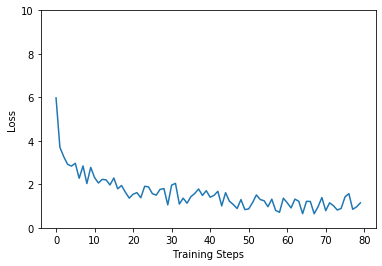

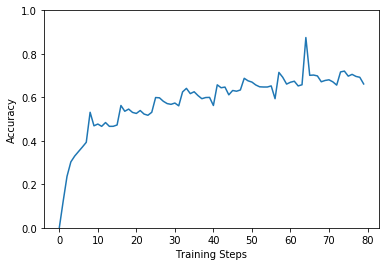

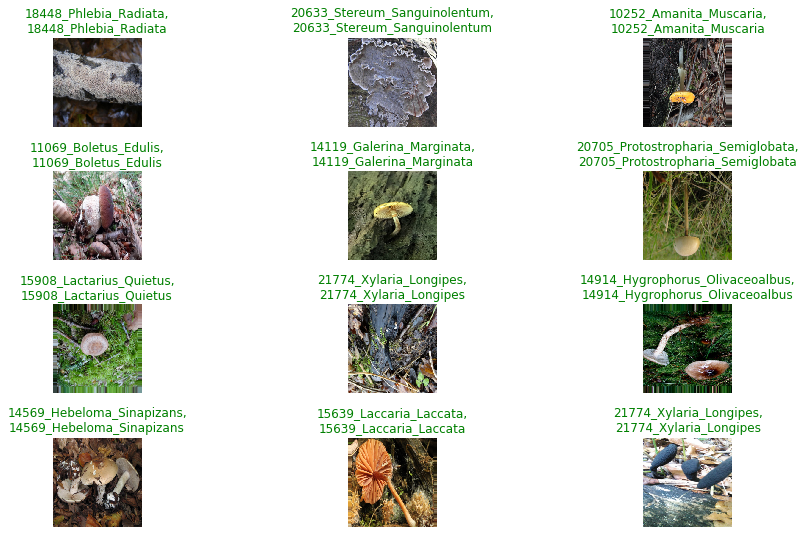

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,10])
plt.plot(batch_stats_callback.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

label_id = np.argmax(label_batch, axis=-1)

plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(4,3,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title() + ",\n" + class_names[label_id[n]], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [0]:
model.save("inaturalist-inception.h5")